## Описание проекта ##

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.

## Часть 1. Приоритизация гипотез.

### Описание данных

Файл `/datasets/hypothesis.csv`.
- `Hypothesis` — краткое описание гипотезы;
- `Reach` — охват пользователей по 10-балльной шкале;
- `Impact` — влияние на пользователей по 10-балльной шкале;
- `Confidence` — уверенность в гипотезе по 10-балльной шкале;
- `Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

### Загрузите данные и подготовьте их к анализу

In [1]:
import pandas as pd

data=pd.read_csv('/datasets/hypothesis.csv')
data


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


Приведем название столбцов к общему формату. Необходимо сделать переименование колонок. (предобработка данных)

In [2]:
data.columns = [x.lower() for x in data.columns.values]
data.columns

Index(['hypothesis', 'reach', 'impact', 'confidence', 'efforts'], dtype='object')

### Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

In [3]:
data['ICE'] = (data['impact'] * data['confidence']) / data['efforts']
data[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день...",16.200000
0,"Добавить два новых канала привлечения трафика,...",13.333333
7,Добавить форму подписки на все основные страни...,11.200000
6,Показать на главной странице баннеры с актуаль...,8.000000
2,Добавить блоки рекомендаций товаров на сайт ин...,7.000000
1,"Запустить собственную службу доставки, что сок...",2.000000
5,"Добавить страницу отзывов клиентов о магазине,...",1.333333
3,"Изменить структура категорий, что увеличит кон...",1.125000
4,"Изменить цвет фона главной страницы, чтобы уве...",1.000000


### Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

In [4]:
data['RICE'] = (data['reach'] * data['impact'] * data['confidence']) / data['efforts']
data[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,hypothesis,RICE
7,Добавить форму подписки на все основные страни...,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,56.0
0,"Добавить два новых канала привлечения трафика,...",40.0
6,Показать на главной странице баннеры с актуаль...,40.0
8,"Запустить акцию, дающую скидку на товар в день...",16.2
3,"Изменить структура категорий, что увеличит кон...",9.0
1,"Запустить собственную службу доставки, что сок...",4.0
5,"Добавить страницу отзывов клиентов о магазине,...",4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3.0


### Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

Метод `RICE` учитывает больше параметров чем `ICE`. При расчете `RICE` мы учитываем такой параметр как `Reach` — скольких пользователей затронет изменение, которое вы хотите внести. Из-за этого он более точно позволяет приоретизировать гипотезы. Данный метод целесообразно применять, когда оцениваемые гипотезы затрагивают разные по обьемам группы пользователей
Гипотеза №7 затронет всех пользователей интернет магазина, в то время как гипотеза №4 коснется меньшего числа пользователей (не все пользователи начинают свой путь по сайту с главной страницы)
В нашем случае использование метода `RICE` более предпочтительнее, и приоретизация по данному методу более точно отражает значимость гипотез. Гипотеза №7 имеет максимальный приоритет.

## Часть 2. Анализ A/B-теста

### Описание данных

Вы провели A/B-тест и получили результаты, которые описаны в файлах `/datasets/orders.csv` и `/datasets/visitors.csv`

Файл `/datasets/orders.csv`.
- `transactionId` — идентификатор заказа;
- `visitorId` — идентификатор пользователя, совершившего заказ;
- `date` — дата, когда был совершён заказ;
- `revenue` — выручка заказа;
- `group` — группа A/B-теста, в которую попал заказ.

Файл `/datasets/visitors.csv`.
- `date` — дата;
- `group` — группа A/B-теста;
- `visitors` — количество пользователей в указанную дату в указанной группе A/B-теста

### Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения. ###

In [5]:
import pandas as pd
import datetime as dt
import numpy as np

import warnings

warnings.simplefilter('ignore')

orders = pd.read_csv('//datasets/orders.csv')
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

visitors = pd.read_csv('/datasets/visitors.csv')
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

display(orders.head())
display(visitors.head()) 


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [6]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'], 
        orders['group'] == x['group'])].agg({'date' : 'max', 
                                            'group' : 'max', 
                                            'transactionId' : 'nunique', 
                                            'visitorId' : 'nunique', 
                                            'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], 
        visitors['group'] == x['group'])].agg({'date' : 'max', 
                                               'group' : 'max', 
                                               'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], 
                                        right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeData.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


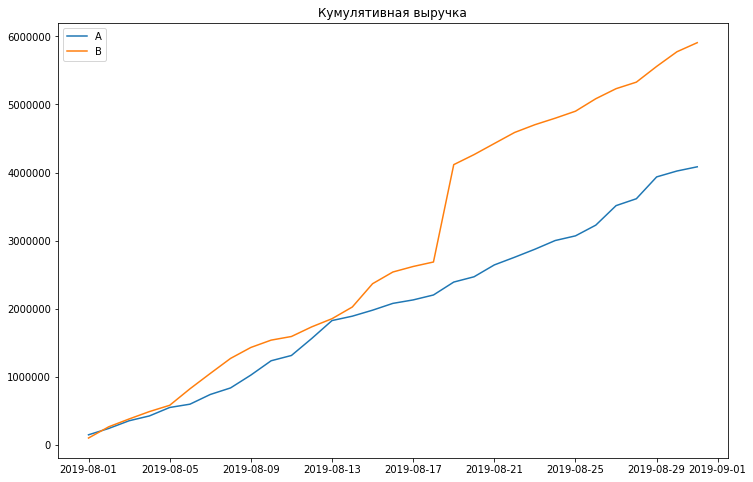

In [7]:
import matplotlib.pyplot as plt

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
plt.figure(figsize=(12,8))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A',)

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.title('Кумулятивная выручка')
plt.legend() 

**Вывод:** Выручка почти равномерно увеличивается в течение всего теста. Хороший знак. Однако график выручки группы `B` в нескольких точках резко растет. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке.

### Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения. ###

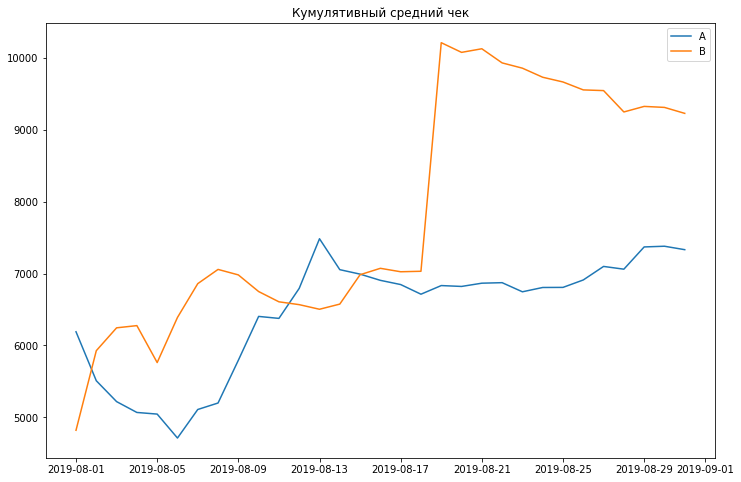

In [8]:
# Построим графики среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов:
plt.figure(figsize=(12,8))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('Кумулятивный средний чек')
plt.legend() 

**Вывод:** За месяц средний чек по группе `А` становится более равномерным, а вот по группе `B`мы наблюдаем резкий всплес в районе 18-19 числа. Скорее всего была совершена аномально большая покупка (такое бывает). Данный заказ исказил данные по группе. Для получения корректных данных на графике необходимо большее число наблюдений за группой `B`. Иными словами, опираясь на собранные данные мы можем сделать предположение о среднем чеке по группе `A` на уровне 7000 руб. Но для группы `B` данных недостаточно.

### Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. ###

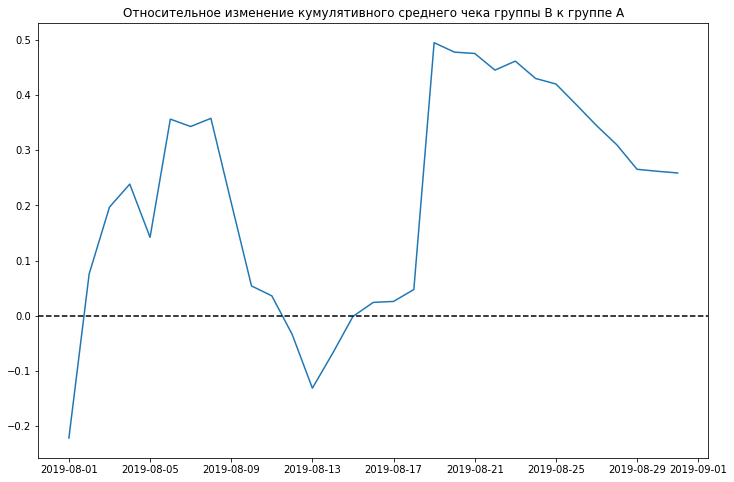

In [21]:
# собираем данные в одном датафрейме

mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, 
                                                   left_on='date', 
                                                   right_on='date', 
                                                   how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.figure(figsize=(12,8))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.title('Относительное изменение кумулятивного среднего чека группы В к группе А')

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 

**Вывод:** В нескольких точках график различия между сегментами резко «скачет». Это говорит о крупных заказах.

### Постройте график кумулятивной конверсии по группам. ###

['2019-08-01', '2019-09-01', 0.024, 0.037]

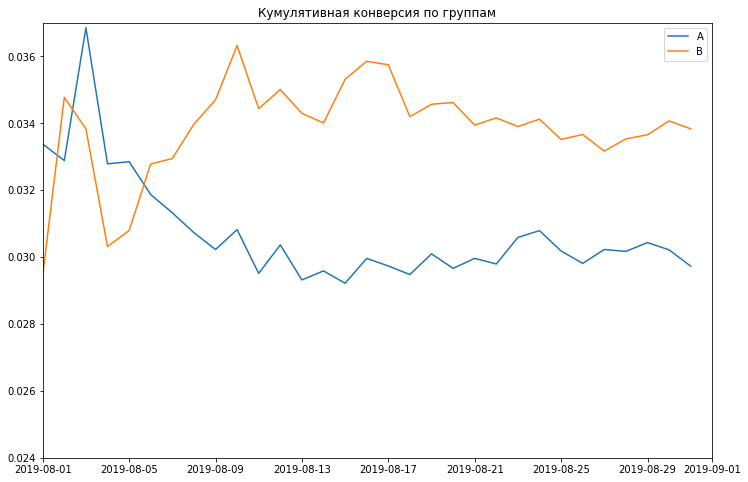

In [22]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize=(12,8))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.title('Кумулятивная конверсия по группам')

# задаем масштаб осей
plt.axis(["2019-08-01", '2019-09-01', 0.024, 0.037])

**Вывод:** Конверсия группы `B` стабильно выше. Мы наблюдаем стандартный график. В начале идут большие скачки в связи с небольшим промежутком анализа, и далее они сгажываются. К концу месяца можно говорить об установившемся значении кумулятивной конверсии для обеих групп.

### Постройте график относительного изменения кумулятивной конверсии группы B к группе A. ###

['2019-08-01', '2019-09-01', -0.3, 0.3]

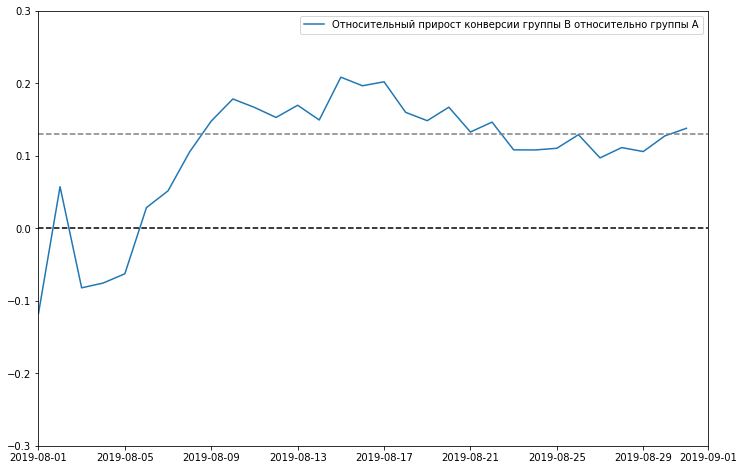

In [11]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], 
                                                                           left_on='date', 
                                                                           right_on='date', 
                                                                           how='left', suffixes=['A', 'B'])

# сторим график
plt.figure(figsize=(12,8))
plt.plot(mergedCumulativeConversions['date'], 
         mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, 
         label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.13, color='grey', linestyle='--')
plt.axis(["2019-08-01", '2019-09-01', -0.3, 0.3])

**Вывод:** Мы наблюдаем постоянный рост относительного изменения конверсии группы B к группе A. В целом отношение конверсии ещё не установилось, и сейчас делать какие-либо выводы по тесту нельзя. Впрочем, сперва стоит проанализировать аномалии, возможно, они изменят картину

### Постройте точечный график количества заказов по пользователям ###

,userId,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


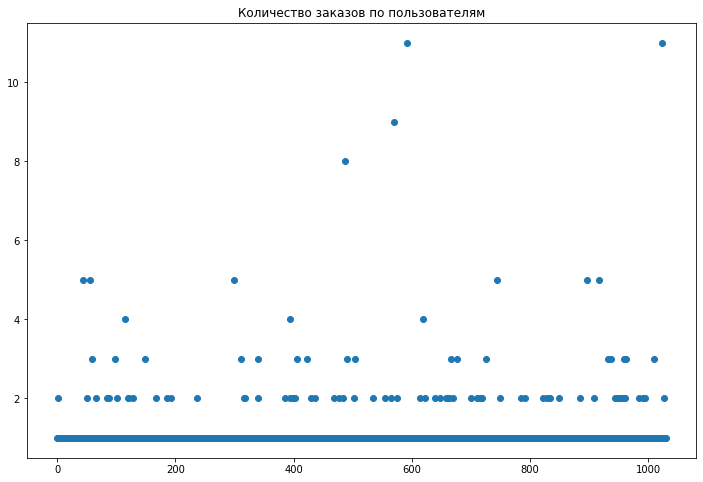

In [12]:
# получам данные о количестве заказов
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsers.columns = ['userId', 'orders']

display(ordersByUsers.sort_values(by='orders', ascending=False).head(10))

# серия из чисел от 0 до количества наблюдений в ordersByUsers
plt.figure(figsize=(12,8))
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.title('Количество заказов по пользователям')
plt.scatter(x_values, ordersByUsers['orders']) 

**Вывод:** Большенство пользователей делали 1-3 заказа, но есть и "уникальные" которые совершили 11 заказов.Их точная доля не ясна — непонятно, считать их аномалиями или нет.

### Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей. ###

In [13]:
display(ordersByUsers.sort_values(by='orders', ascending=False).head(10))

# Метод np.percentile('column', [percentile1, percentile2, percentile3]) находит перцентили.
np.percentile(ordersByUsers['orders'], [95, 99])

,userId,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


array([2., 4.])

**Вывод:** Всего 5% покупателей оформили более 2 заказов и всего 1% офрмили более 4. Разумно выбрать 2 заказа на одного пользователя за нижнюю границу числа заказов, и отсеять аномальных пользователей по ней. Пользователи, совершившие много заказов, влияют на числитель формулы конверсии. Скорее всего, их поведение отличается от нормального. Если речь не идёт об интернет-магазине с регулярным спросом, «обычный» пользователь совершает не больше двух заказов за короткий срок.

### Постройте точечный график стоимостей заказов. Сделайте выводы и предположения. ###

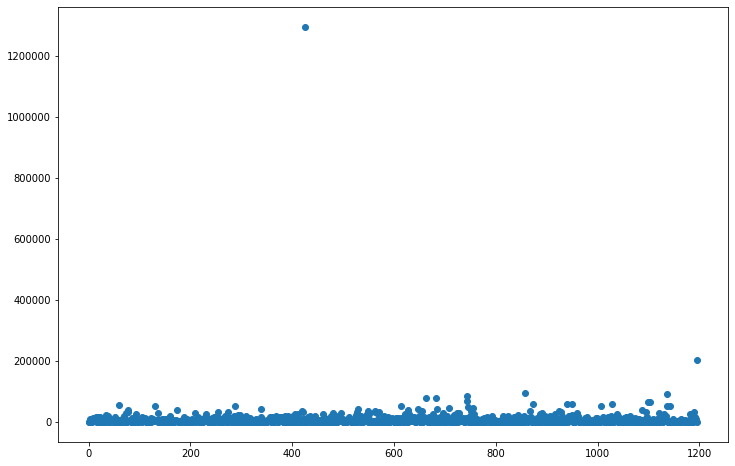

In [14]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(12,8))
plt.title('Точечный график стоимостей заказов')
plt.scatter(x_values, orders['revenue']) 

**Вывод:** Мы видим один аномальный заказ более чем на 1 млн и еще один чуть больше чем 200 тыс. Эти заказы явно оказывают негативное влияние на нашу выборку. Вполне возможно, что в дальнейших  расчетах мы не будем их учитывать.

### Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов. ###

In [15]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

**Вывод:** 5% пользователей оформили заказ на сумму свыше 28 тыс. Если такие дорогие заказы попадут в одну из групп теста, они сразу же исказят результаты и сделает победителем ту группу, где оказались. При этом такие покупки — редкость, исключение, которое проявилось не из-за тестирования гипотезы, а случайно.

Такие аномально дорогие заказы следует удалять из теста. Можно провести и анализ самых дешёвых заказов. Однако из-за маленькой стоимости они слабо влияют на средний чек. 

### Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. ###

In [16]:
import scipy.stats as stats

# пользователи группы А по дням
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

# кумулятивная суума пользователей А по дням
visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

#пользователи группы B по дням
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

# кумулятивная суума пользователей B по дням
visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

# пользователи группы A совершившие хотя бы 1 заказ
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

# кумулятивные данные по группе А
ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

# пользователи группы B совершившие хотя бы 1 заказ
ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

# общая таблица с кумулятивными данными
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

display(data.head(5))
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders'] 
sampleA = pd.concat([ordersByUsersA['orders'],
                     pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],
                     pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
display("{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
 
display("{0:.3f}".format(sampleB.mean() / sampleA .mean() - 1))

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


'0.00840'

'0.138'

**Вывод** P-value значительно меньше 0.05, потому нулевую гипотезу отвергаем (различий между группами нет). Анализ сырых данных показывает, что в конверсии между группами есть статистически значимые различия. Относительный прирост конверсии группы `В` к конверсии группы `А` равен 13,8%

### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. ###

In [17]:
display('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], 
                                            orders[orders['group']=='B']['revenue'])[1]))
display('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/
                         orders[orders['group']=='A']['revenue'].mean()-1))

'0.365'

'0.259'

**Вывод** P-value больше 0.05 - статистически значимых отличий в среднем чеке между группами нет.Хотя разница между группами значительна почти 26%. Это говорит нам о том что ввыборке есть выбросы, аномально дорогие заказы.

### Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. ###

In [18]:
# выборка по количеству закзаов
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['userId'],
    ],
    axis=0,
)

# выборка по сумме заказов
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
display(abnormalUsers.head(5))

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
dtype: int64

In [19]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'],
        pd.Series(0,
            index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),
            name='orders')],axis=0,)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders')], axis=0,) 
print('{0:.5f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

0.00652
0.173


**Вывод:** P-value меньше 0.05 поэтому отвергаем нуливую гипотезу. Как и сырыми данными статистическая значимочть достигнута. Сегмент B значительно лучше сегмента А. (на 17%)

### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. ###

In [20]:
print('{0:.3f}'.format(stats.mannwhitneyu(orders[np.logical_and(orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
            orders[np.logical_and(orders['group'] == 'B', np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )]['revenue'])[1]))

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

0.369
-0.020


**Выводы:** По все видимости изменения которые проверяем не оказывают существенного влияния средний чек. Это хорошо показывают очищинные данные. P-value значительно больше 0.05 следовательно статистически значемых различий в среднем чеке нет. Да и относительная разница всего 2%

## Общий вывод и решение по результатам теста ##


В рамках предоставленных данным мы не видим какие изменения в работе интернет магазина мы тестируем. Если изменения направленны на изменения среднего чека, то результат не достигнут и требуется дальнейшее продолжения теста. Визуально видно, что средний чек по группе `B` вырос. Правда сновнай рост достигнут благодаря аномальным заказам случившимся в период тестирования. Но тем не менен изменения среднего чека по "сырым" и по "очищенным" данным не показали стаистической значимости

Если же изменения направлены на изменения конверсии, то результат достигнут. Конверсия по группе `B` лучше, что и показали статистические тесты по "сырым" и очищенным данным. Как видно из графика кумулятивной конверсии по группам, показатели конверсии в конце месяца достаточно стабильна. 